In [11]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D, Dropout
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np
import pandas as pd
import time

## Preprocessing

In [15]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
        'data/training',
        target_size=(64, 64), # same as the input_shape parameter at step 1 (Convolution)
        batch_size=32,
        class_mode="categorical")

test_set = test_datagen.flow_from_directory(
        'data/testing',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 1055 images belonging to 6 classes.
Found 355 images belonging to 6 classes.


In [16]:
len(training_set)

33

In [17]:
# Initializing the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))
classifier.add(Dropout(0.3)) 
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation="relu")) # didn't need the input shape when taking from another convolution layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.3)) 

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full Connection 
classifier.add(Dense(units = 128, activation = 'relu')) # hidden layer
classifier.add(Dense(units = 6, activation = 'softmax')) # outpput layer

In [32]:
# Compiling the CNN
from keras import optimizers
adam = optimizers.Adam(learning_rate=1e-5)
classifier.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
history = classifier.fit_generator(training_set,
                    steps_per_epoch=100, # number of images in training set
                    epochs=25,
                    validation_data = test_set) # number of images in test set

Epoch 1/25
100/100 [==============================] - 37s 370ms/step - loss: 0.1307 - accuracy: 0.9587 - val_loss: 5.3893 - val_accuracy: 0.3268
Epoch 2/25
100/100 [==============================] - 36s 356ms/step - loss: 0.1029 - accuracy: 0.9690 - val_loss: 4.0298 - val_accuracy: 0.3296
Epoch 3/25
100/100 [==============================] - 35s 352ms/step - loss: 0.0931 - accuracy: 0.9725 - val_loss: 4.7641 - val_accuracy: 0.3437
Epoch 4/25
100/100 [==============================] - 37s 370ms/step - loss: 0.0885 - accuracy: 0.9765 - val_loss: 4.7511 - val_accuracy: 0.3437
Epoch 5/25
 92/100 [==========================>...] - ETA: 2s - loss: 0.0837 - accuracy: 0.9745

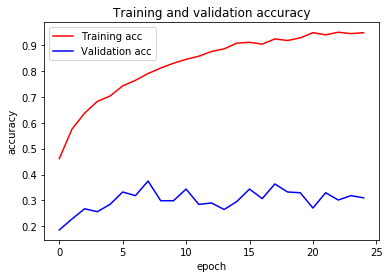

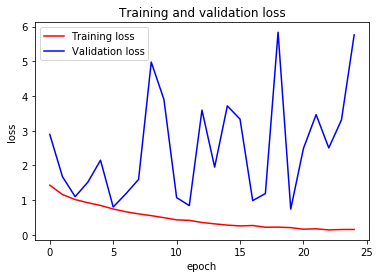

In [28]:
#Graphing our training and validation
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')  
plt.xlabel('epoch')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss')  
plt.xlabel('epoch')
plt.legend()
plt.show()

In [23]:
# classify a single image
def read_image(file_path):
    print("[INFO] loading and preprocessing image...")  
    image = load_img(file_path, target_size=(64, 64))  
    image = img_to_array(image)  
    image = np.expand_dims(image, axis=0)
    image /= 255.  
    return image

In [26]:
test = read_image("data/training/bar/wsj159.png")
classifier.predict_classes(test)

[INFO] loading and preprocessing image...


array([0])

In [2]:
def test_single_image(path):
    labels = ['bar', 'info', 'line', 'map', 'other', 'scatter']
    images = read_image(path)
    time.sleep(.5)
    preds = classifier.predict_proba(images)
    for idx, l, x in zip(range(0,6), labels , preds[0]):
        print("ID: {}, Label: {} {}%".format(idx, l, round(x*100,2) ))
    print('Final Decision:')
    time.sleep(.5)
    for x in range(3):
        print('.'*(x+1))
        time.sleep(.2)
    class_predicted = classifier.predict_classes(images)
    class_dictionary = training_set.class_indices  
    inv_map = {v: k for k, v in class_dictionary.items()}  
    print("ID: {}, Label: {}".format(class_predicted[0], inv_map[class_predicted[0]]))  
    return load_img(path)

In [3]:
test_single_image("../dataviz_train/wsj321.png")

NameError: name 'read_image' is not defined